## Loading library

*Tensor Flow* library is a requirement to Keras. To install it do: `pip3 install tensorflow`.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.__version__

'2.5.0'

## Loading dataset using Pandas

In [3]:
import pandas as pd

In [4]:
data_train_file = 'data/fashion-mnist_train.csv'
data_test_file = 'data/fashion-mnist_test.csv'

# this method returns a pandas DataFrame object "pandas.core.frame.DataFrame"
data_train = pd.read_csv(data_train_file)
data_test = pd.read_csv(data_test_file)

print(data_train.shape)
data_train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Treating data

In [125]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# This function slices a panda data frame into two arrays. The first with labels and the other with
# all samples and their features - one by line. 
def treat_raw_data_frame(data_frame):
    # data is normalized to the max valua a pixel can take (255) - Gray Scale
    # each sample is a 28x28 array serialized
    features = data_frame.values[:, 1:]/255

    # This normalization ([0-1]) can also be done by using sklearn
    scaler = MinMaxScaler(feature_range=(0,1))
    fatures = scaler.fit_transform(data_frame.values[:, 1:])
    
    labels = data_frame.label.values

    # transforming labels to "one-hot" encoding
    # if We use sparse_categorical_crossentropy we do not need to one-hot encoding our labels
#    labels = tf.keras.utils.to_categorical(labels)
    return shuffle(labels, features)

train_labels, train_features = treat_raw_data_frame(data_train)
test_labels, test_features = treat_raw_data_frame(data_test)

print("Shape of trainning feature dataset: {}".format(train_features.shape))
print("Shape of trainning labels dataset: {}".format(train_labels.shape))

Shape of trainning feature dataset: (60000, 784)
Shape of trainning labels dataset: (60000,)


In [72]:
train_features[0, 90:110]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

## Visualizing samples using matplotlib

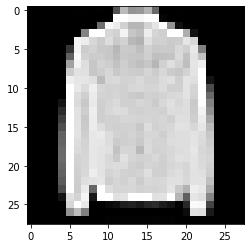

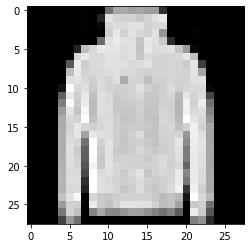

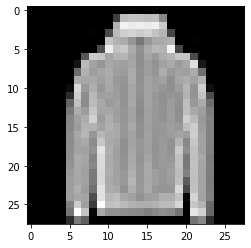

In [252]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This functions plots a sample rechape array into a 28x28 2 dimensional array
def plot(data_set, index):
    plt.figure()
    plt.imshow(np.reshape(data_set[index, :], (28,28)), "gray")


_count = 0
for i in range(len(train_labels)):
    if train_labels[i] == 4:
        plot(train_features, i)
        _count += 1
    if _count == 3:
        break


## Designing the Model

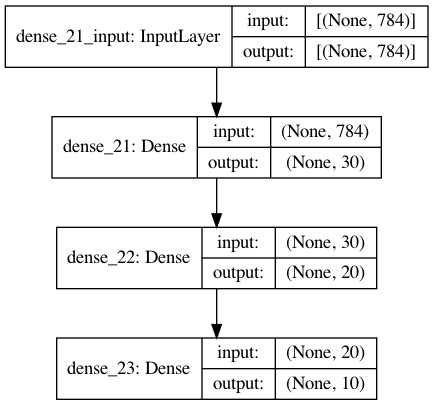

In [126]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Define a sequential model. This defines the way Keras will generate a model. Keras has three different
# type of models: sequential, functional and subclassing [3].
model = tf.keras.Sequential()

# Two hidden layers, activation function is rectified linear unit
# all activation functions can be found at [4]. [5] to read more about about
# Keras layers
model.add(tf.keras.layers.Dense(30, activation=tf.nn.relu, input_shape=(784,))) # 1st hidden layer
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))                     # 2nd hidden layer

# Output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # softmax gives probability to each class classes

# Keras provides resource for plotting the Neural Network architecture and parameters.
tf.keras.utils.plot_model(model, show_shapes=True)

## Trainning (fit), validating (validation_split param) and Testing (evaluate) the Model

In [157]:
# This specifies parameters for training the model and evaluate training progress
# to learn more about optimizers [9]
# model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# prints summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_22 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [158]:
# Trainning model == fit function
EPOCHS=10
BATCH_SIZE=128

# Using last 10% as validation set make sure data is suffled beforehand
model.fit(train_features, train_labels, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8796 - val_loss: 0.3684 - val_accuracy: 0.8723
Epoch 2/10
422/422 [==============================] - 1s 1ms/step - loss: 0.3279 - accuracy: 0.8828 - val_loss: 0.4062 - val_accuracy: 0.8610
Epoch 3/10
422/422 [==============================] - 1s 1ms/step - loss: 0.3254 - accuracy: 0.8845 - val_loss: 0.3613 - val_accuracy: 0.8758
Epoch 4/10
422/422 [==============================] - 1s 1ms/step - loss: 0.3207 - accuracy: 0.8849 - val_loss: 0.3953 - val_accuracy: 0.8640
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.8872 - val_loss: 0.3687 - val_accuracy: 0.8748
Epoch 6/10
422/422 [==============================] - 1s 1ms/step - loss: 0.3107 - accuracy: 0.8883 - val_loss: 0.4417 - val_accuracy: 0.8467
Epoch 7/10
422/422 [==============================] - 1s 1ms/step - loss: 0.3068 - accuracy: 0.8888 - val_loss: 0.3981 - val_accuracy: 0.8620
Epoch 

In [159]:
# Validating model
test_loss, test_acc = model.evaluate(test_features, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8715


In [187]:
test_acc, test_loss

(0.8715000152587891, 0.3643907606601715)

## Confusion Matrix

[[806   0  13  17   3   1 153   1   5   1]
 [  2 985   1   8   0   0   4   0   0   0]
 [ 11   2 731   9 119   0 125   0   3   0]
 [ 33  20  10 848  49   0  39   0   1   0]
 [  1   1  51  14 824   0 107   0   2   0]
 [  1   0   0   0   0 900   0  55   5  39]
 [110   4  44  13  53   0 765   0  11   0]
 [  0   0   0   0   0  12   0 922   0  66]
 [  4   0   7   2   6   1  13   5 962   0]
 [  0   0   0   0   0   3   0  25   0 972]]


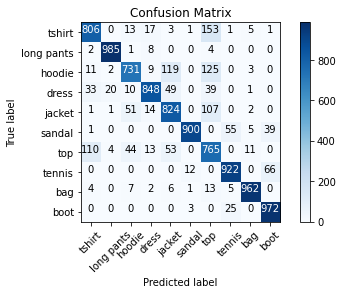

In [210]:
# Helps to visualize mistakes in evaluating data.  
from sklearn.metrics import confusion_matrix
import itertools

# THis function was C&P from [10]
def plot_confusion_matrix(cm, classes,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true=test_labels, y_pred=model.predict(test_features, verbose=0).argmax(axis=-1))
print(cm)

cm_plot_labels = ["tshirt", "long pants", "hoodie", "dress", "jacket", "sandal", "top", "tennis", "bag", "boot"]
plot_confusion_matrix(cm, classes=cm_plot_labels, title="Confusion Matrix")

## Feeding one sample to model and getting prediction/classification

In [181]:
# Fetching sample from testing dataset
sample = test_features[21:22, :]

In [182]:
# Correct label for first sample in the testing dataset
test_labels[21:22]

array([4])

In [183]:
model.predict(sample)

array([[3.4392923e-07, 4.6506622e-12, 1.2935430e-02, 2.0607325e-09,
        9.4266152e-01, 3.9427476e-14, 4.4400454e-02, 4.6666779e-14,
        2.2698919e-06, 1.3734964e-15]], dtype=float32)

In [184]:
# Returns the index of the max value in the "one-hot" array
model.predict(sample).argmax(axis=-1)

array([4])

## <span style="color:red">[!]</span>  Problematic #001 <span style="color:red">[!]</span>

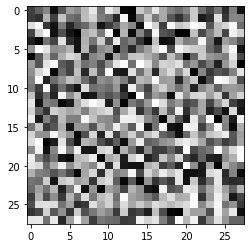

In [171]:
# Creating sample with random features
fake_sample = np.random.rand(*test_features[0:1, :].shape)
plt.figure()
_ = plt.imshow(np.reshape(fake_sample, (28,28)), "gray")

In [172]:
# Model try to fit random generated sample to some known category 
model.predict(fake_sample)

array([[3.6532299e-07, 1.3172891e-07, 7.3165592e-11, 5.0328495e-16,
        3.4346532e-12, 5.5406196e-10, 4.7005638e-08, 8.4145091e-09,
        9.9999714e-01, 2.2679017e-06]], dtype=float32)

In [173]:
model.predict(fake_sample).argmax()

8

## Saving/Loading model

In [211]:
# Serializes model in disk. The serialized format is a directory. [8]
model.save('example_001.h5')

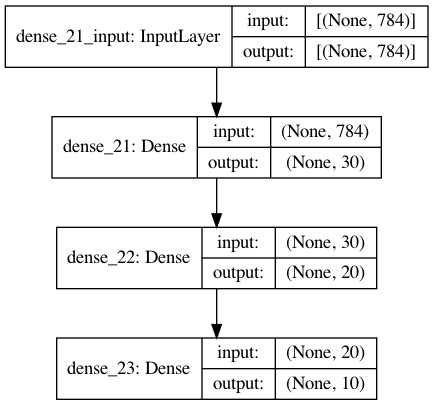

In [213]:
model_02 = keras.models.load_model('example_001.h5')
tf.keras.utils.plot_model(model_02, show_shapes=True)

In [216]:
# saves model's architecture to JSON (you can do the same to YAML)
model_arch_json = model.to_json()
model_arch_json

'{"class_name": "Sequential", "config": {"name": "sequential_7", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_21_input"}}, {"class_name": "Dense", "config": {"name": "dense_21", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_22", "trainable": true, "dtype": "float32", "units": 20, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": 

In [224]:
model_03 = tf.keras.models.model_from_json(model_arch_json)
model_03.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_22 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [237]:
# it is possible also to only export weights. This can be useful in case low-cost 
# transfering trainning models that the architecture is known beforehand. 
model_02.save_weights('model_02_weights.h5')
model_03.load_weights('model_02_weights.h5')
print(model_03.get_weights()[0])
print(model_02.get_weights()[0])

[[ 0.04966259  0.15367755  0.04519537 ...  0.32546443  0.03893154
   0.04247389]
 [ 0.44394    -0.04180678 -0.5248189  ...  0.10802837  0.10131452
   0.2663437 ]
 [ 0.2248061   0.33861023 -0.05542587 ...  0.22860213  0.7854216
  -0.27453476]
 ...
 [-0.42087084 -0.16135223  0.15296328 ... -0.1196061  -0.35144615
   0.08462273]
 [-0.27342543  0.17020959  0.32472867 ...  0.10632379 -0.08893176
   0.2640323 ]
 [-0.23208931  0.25317734  0.08264506 ...  0.02864002 -0.1861176
  -0.23335448]]
[[ 0.04966259  0.15367755  0.04519537 ...  0.32546443  0.03893154
   0.04247389]
 [ 0.44394    -0.04180678 -0.5248189  ...  0.10802837  0.10131452
   0.2663437 ]
 [ 0.2248061   0.33861023 -0.05542587 ...  0.22860213  0.7854216
  -0.27453476]
 ...
 [-0.42087084 -0.16135223  0.15296328 ... -0.1196061  -0.35144615
   0.08462273]
 [-0.27342543  0.17020959  0.32472867 ...  0.10632379 -0.08893176
   0.2640323 ]
 [-0.23208931  0.25317734  0.08264506 ...  0.02864002 -0.1861176
  -0.23335448]]


## Convolutional Neural Networks

### Importing Libraries

In [267]:
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications.vgg16 as vgg16

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Checking Phsical Devices

In [249]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [250]:
tf.config.experimental.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### Treating/Loading Image Dataset

In [304]:
train_path = 'data/cats_vs_dogs/train'
valid_path = 'data/cats_vs_dogs/valid'
test_path = 'data/cats_vs_dogs/test'

train_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
train_batches = train_batches.flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
valid_batches = valid_batches.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
test_batches = test_batches.flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [308]:
# Grabing one single batch
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

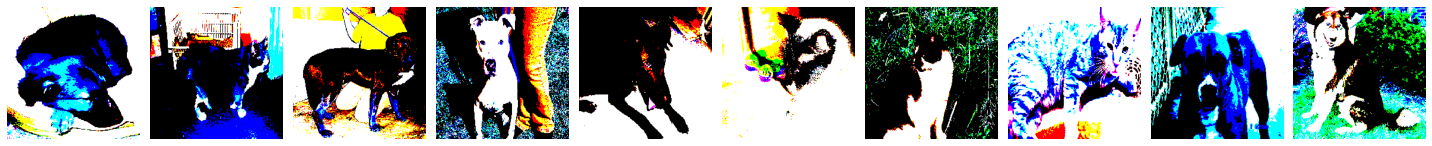

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [309]:
# Auxiliar function for ploting sample
def plot(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot(imgs)
print(labels)

## References

1. https://www.tensorflow.org/guide/keras
1. https://www.kaggle.com/zalando-research/fashionmnist
1. https://keras.io/api/models/
1. https://keras.io/api/layers/activations/
1. https://www.tutorialspoint.com/keras/keras_layers.htm
1. https://www.youtube.com/watch?v=qFJeN9V1ZsI (****)
1. https://www.youtube.com/watch?v=J6Ok8p463C4 (****)
1. https://keras.io/guides/serialization_and_saving/
1. https://keras.io/api/optimizers/
1. https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
1. https://deeplizard.com/learn/video/RznKVRTFkBY (****)
1. https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c